# Loan Approval Prediction Using Decision Trees

This project uses a decision tree classifier to predict whether a loan will be approved based on applicant information such as gender, marital status, education, income, and credit history. After cleaning and encoding the data, models with different tree depths were trained and tested to observe how complexity affects performance. Results show that credit history is the most influential factor in predicting loan approval, and removing it significantly decreases accuracy for both the training and test data.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("future.no_silent_downcasting", True)
pd.options.mode.chained_assignment = None

In [13]:
#filtering data
loan_data_raw = pd.read_csv('loan_data.csv')
loan_data_clean = loan_data_raw.drop(columns=['Loan_ID']).dropna()
loan_data_clean

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,4583,1508.0,128.0,360,1.0,Rural,N
2,Male,Yes,0,Graduate,3000,0.0,66.0,360,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,2583,2358.0,120.0,360,1.0,Urban,Y
4,Male,No,0,Graduate,6000,0.0,141.0,360,1.0,Urban,Y
5,Male,Yes,2,Graduate,5417,4196.0,267.0,360,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,2900,0.0,71.0,360,1.0,Rural,Y
610,Male,Yes,3+,Graduate,4106,0.0,40.0,180,1.0,Rural,Y
611,Male,Yes,1,Graduate,8072,240.0,253.0,360,1.0,Urban,Y
612,Male,Yes,2,Graduate,7583,0.0,187.0,360,1.0,Urban,Y


In [14]:
#Data processing: convert categorical data to numerical information
loan_data_clean['Gender'] = (loan_data_clean['Gender'] == 'Female').astype(int)
loan_data_clean['Married'] = (loan_data_clean['Married'] == 'Yes').astype(int)
loan_data_clean['Loan_Status'] = loan_data_clean.Loan_Status.replace({'N': 0, 'Y': 1})
loan_data_clean['Property_Area'] = loan_data_clean.Property_Area.replace({'Rural':0, 'Urban':1, 'Semiurban':2})
loan_data_clean['Education'] = loan_data_clean.Education.replace({'Graduate':0, 'Not Graduate':1})
loan_data_clean['Dependents'] = loan_data_clean.Dependents.replace({'0':0, '1':1,'2':2,'3+':3})
loan_data_clean = loan_data_clean.astype(float)
loan_data_clean

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,3000.0,0.0,66.0,360.0,1.0,1.0,1.0
3,0.0,1.0,0.0,1.0,2583.0,2358.0,120.0,360.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,1.0,1.0
5,0.0,1.0,2.0,0.0,5417.0,4196.0,267.0,360.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,0.0,1.0
610,0.0,1.0,3.0,0.0,4106.0,0.0,40.0,180.0,1.0,0.0,1.0
611,0.0,1.0,1.0,0.0,8072.0,240.0,253.0,360.0,1.0,1.0,1.0
612,0.0,1.0,2.0,0.0,7583.0,0.0,187.0,360.0,1.0,1.0,1.0


In [15]:
#create training data
np.random.seed(420) 

train_loan = loan_data_clean.sample(frac=0.8)
test_loan = loan_data_clean.drop(index=train_loan.index)

print(train_loan.shape, test_loan.shape)

(414, 11) (104, 11)


In [16]:
y_train_loan = train_loan['Loan_Status']
X_train_loan = train_loan.drop(columns=['Loan_Status']) 
print(y_train_loan.shape, X_train_loan.shape)

y_test_loan = test_loan['Loan_Status']
X_test_loan = test_loan.drop(columns=['Loan_Status']) 
print(X_test_loan.shape, y_test_loan.shape)

(414,) (414, 10)
(104, 10) (104,)


Score on train: 0.8357487922705314
Score on test: 0.7980769230769231


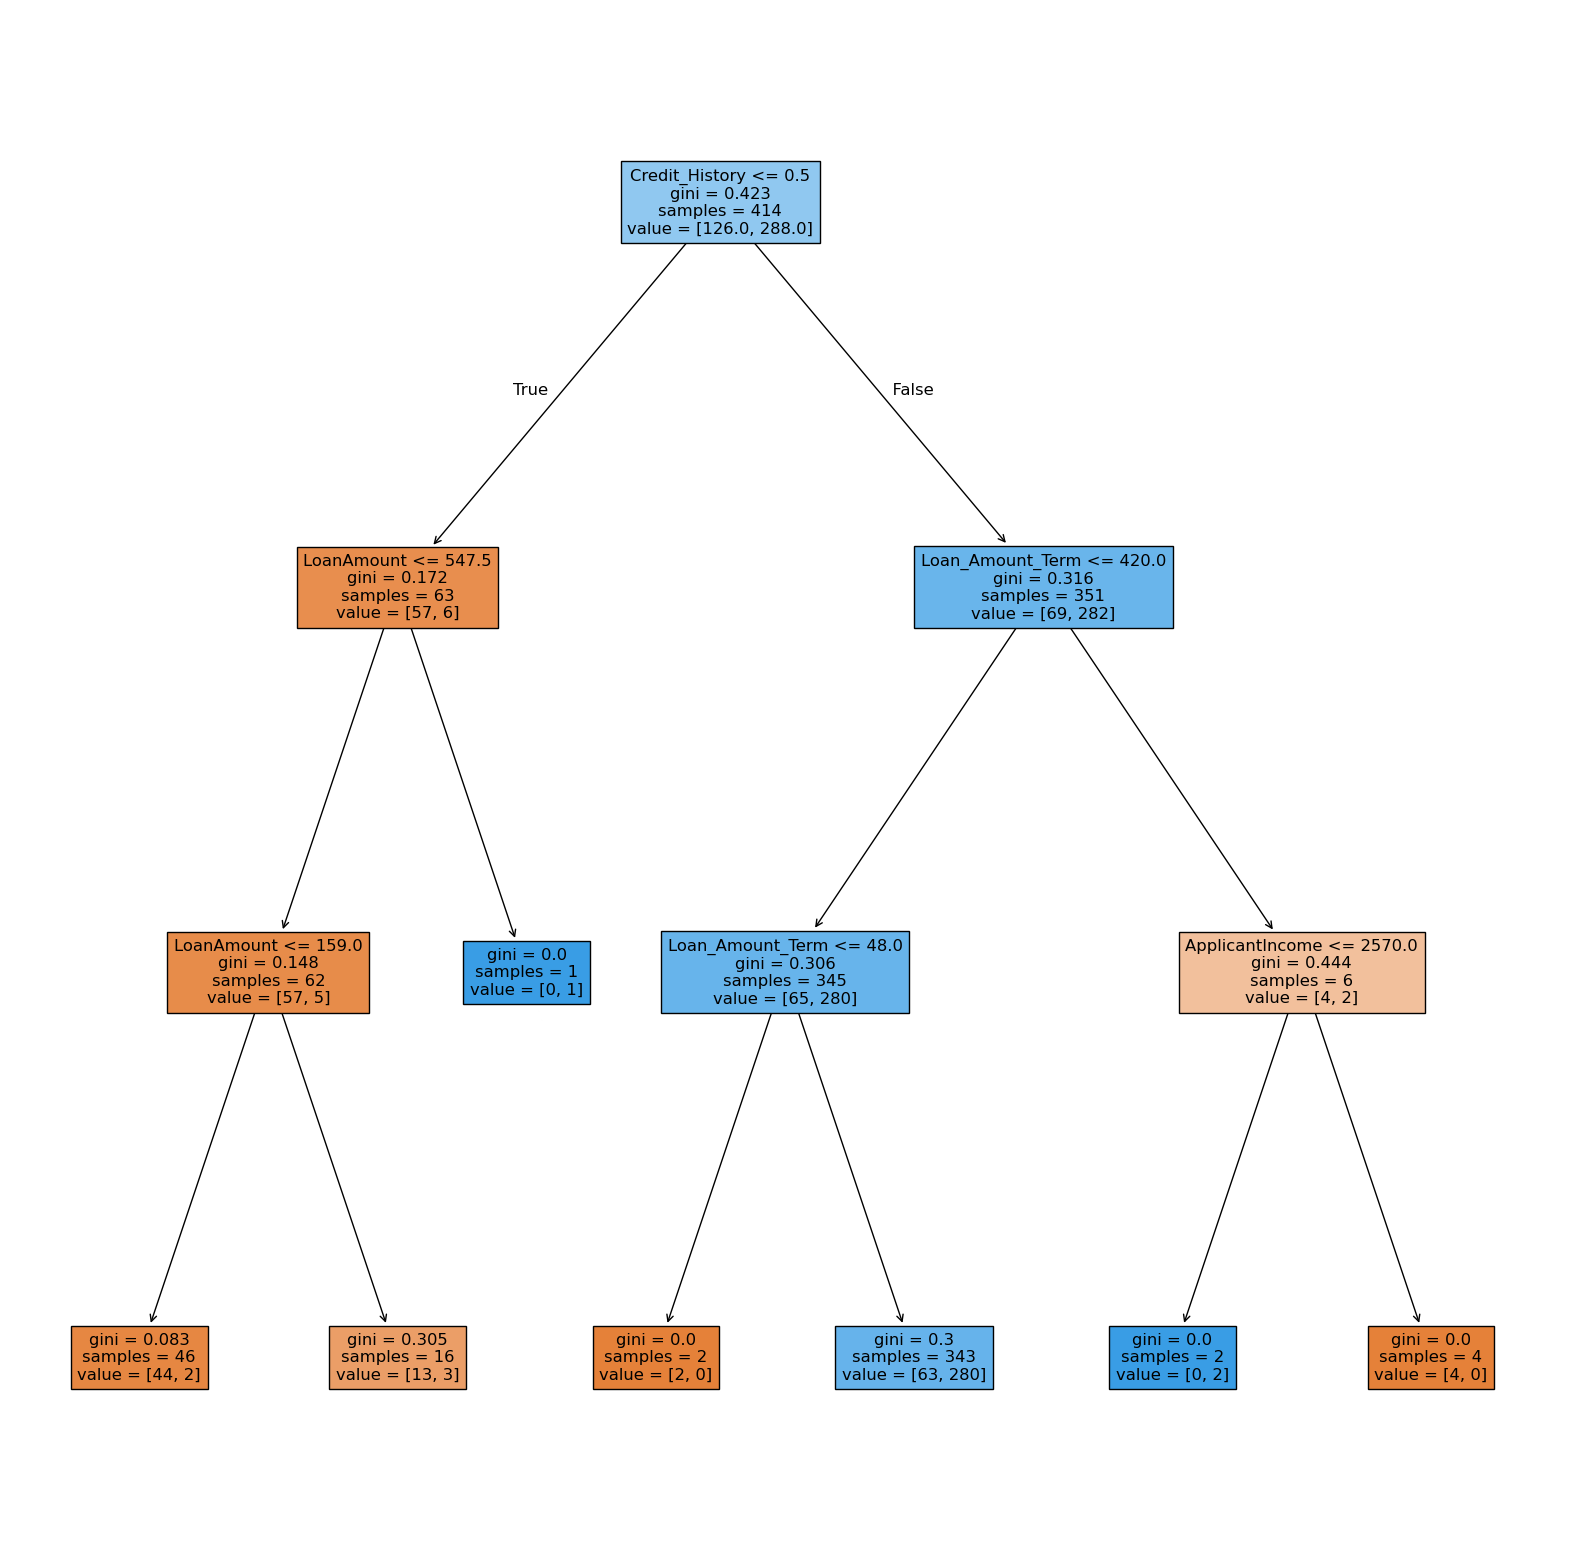

In [17]:
#generating decision tree

from sklearn.tree import DecisionTreeClassifier, plot_tree

T = DecisionTreeClassifier(max_depth=3)
T.fit(X_train_loan, y_train_loan)

train_score = T.score(X_train_loan, y_train_loan) 
test_score = T.score(X_test_loan, y_test_loan)

print('Score on train:', train_score)
print('Score on test:', test_score)

fig, ax = plt.subplots(1, figsize = (20, 20))
p = plot_tree(T, filled = True, feature_names = X_train_loan.columns)

From this decision tree, we can see that having a credit history ≤ 0.5 is the most important factor for predicting whether a loan will be approved. This is because credit history plays a key role in determining loan eligibility and the maximum loan amount an applicant can receive. Applicants with a good credit history are viewed as more reliable borrowers and are therefore more likely to be approved, even for larger loan amounts.

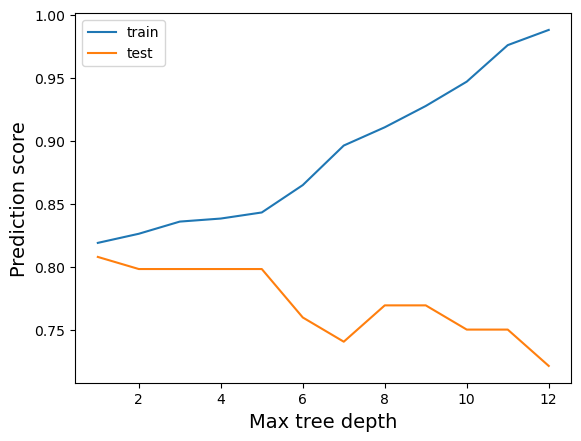

In [18]:
#Create decision trees of different maximum tree depths
train_scores=[]
test_scores=[]
r=range(1,13)
for i in r:
    T = DecisionTreeClassifier(max_depth=i)
    T.fit(X_train_loan, y_train_loan)
    
    train_scores.append(T.score(X_train_loan, y_train_loan))
    test_scores.append(T.score(X_test_loan, y_test_loan))
    
fig, ax = plt.subplots(1)
sns.lineplot(x=r,y=train_scores,label='train')
sns.lineplot(x=r,y=test_scores,label='test')
ax.set_ylabel('Prediction score', fontsize=14)
ax.set_xlabel('Max tree depth', fontsize=14)
ax.legend()

The accuracy improves for the training set as the maximum tree depth increases. We can see that the blue line rises from around 0.82 to about 0.98, showing that the model fits the training data better as it becomes more complex. However, the accuracy does not improve for the test set as the maximum tree depth increases. The orange line stays roughly the same up to a tree depth of about 5, and then it starts to decrease. This indicates that the model begins to overfit the training data and performs worse on unseen data.

**What if we don't have information on Credit_History?**

In [19]:
#data preparation

X2_train_loan = X_train_loan.drop(columns=['Credit_History'])
X2_test_loan = X_test_loan.drop(columns=['Credit_History'])

Score on train: 0.7125603864734299
Score on test: 0.6923076923076923


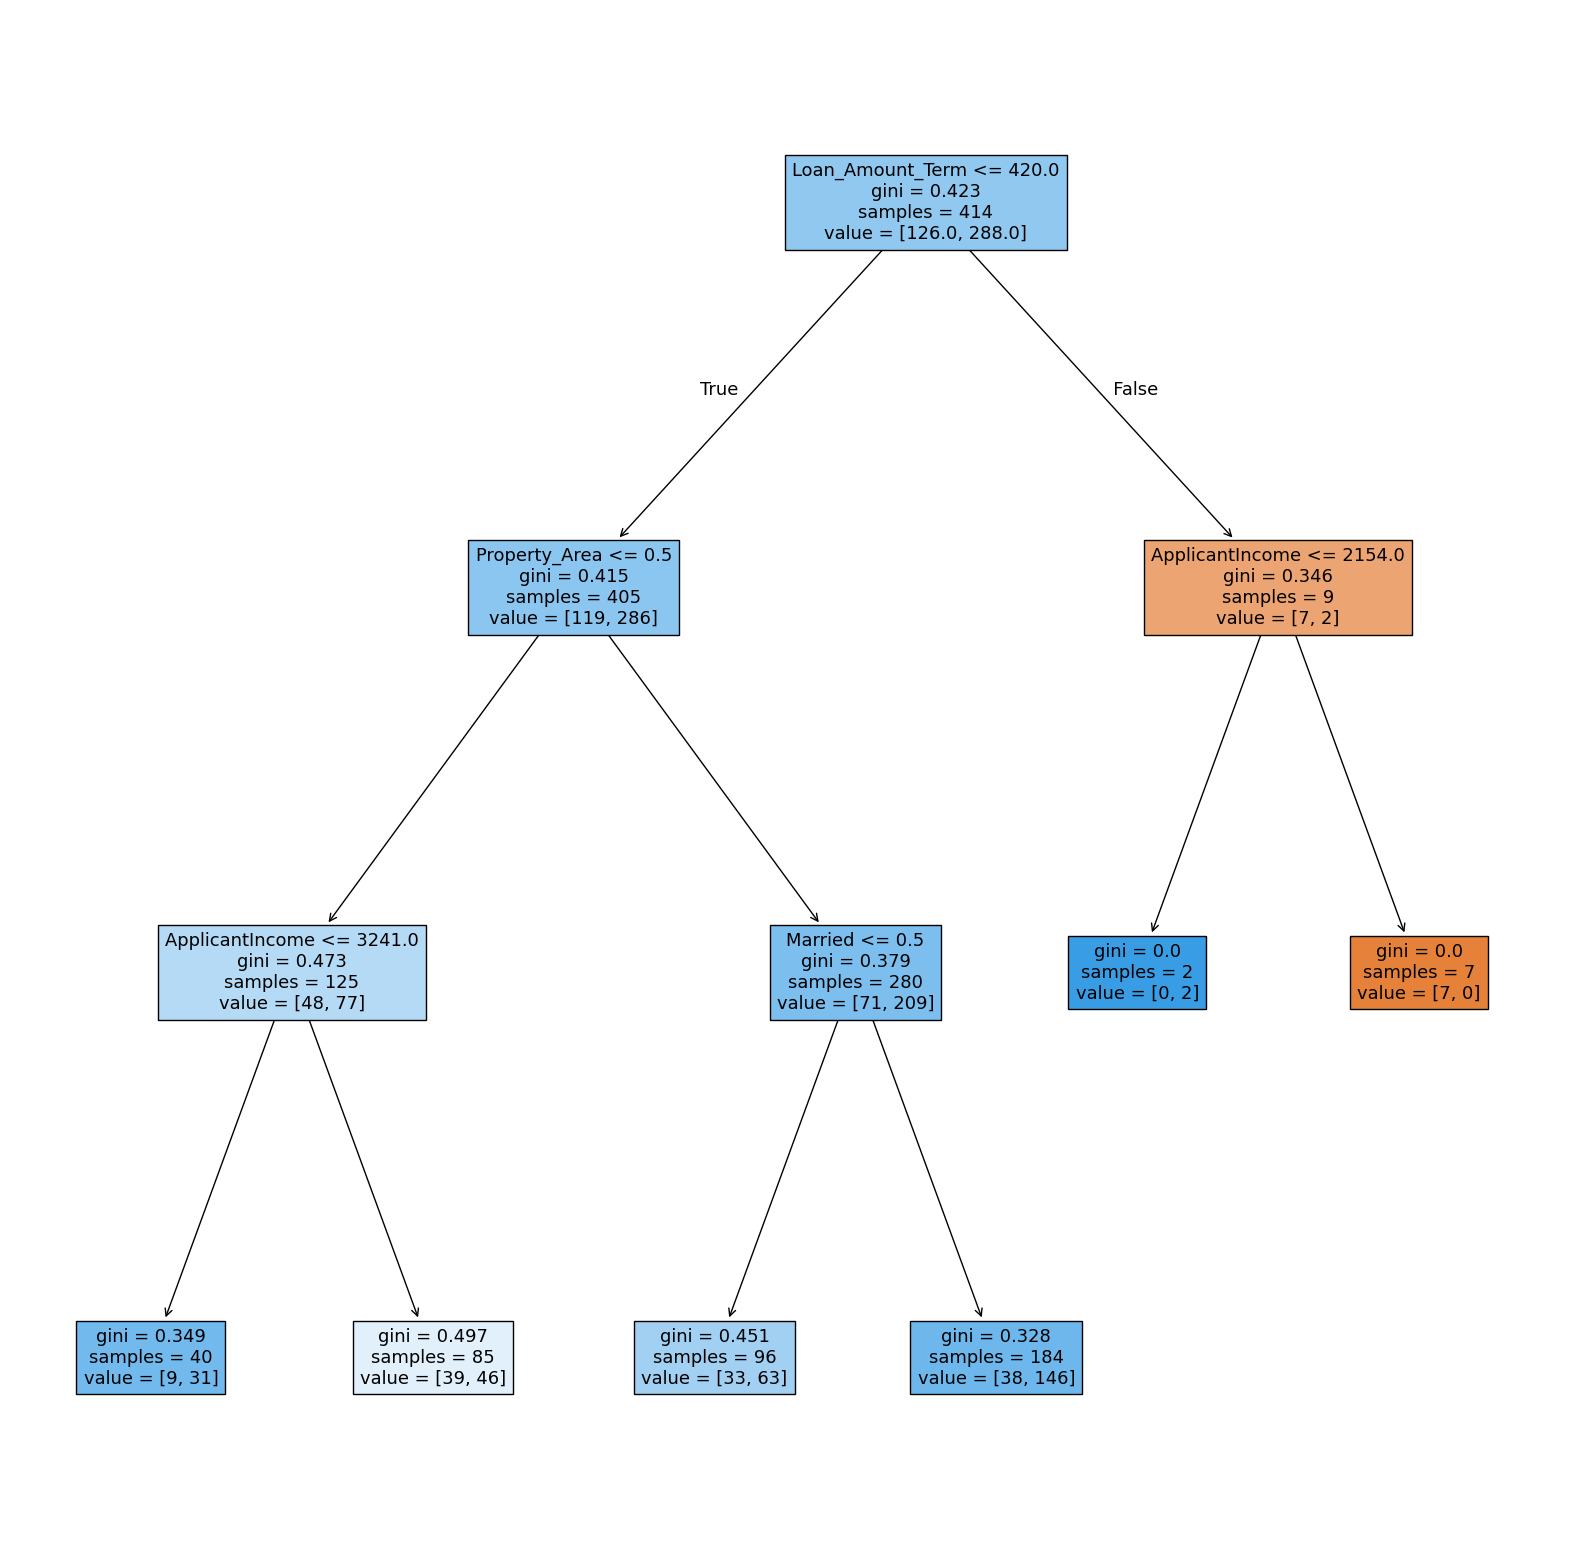

In [20]:
T2 = DecisionTreeClassifier(max_depth=3)

from sklearn.tree import DecisionTreeClassifier, plot_tree

T2.fit(X2_train_loan, y_train_loan)

print('Score on train:', T2.score(X2_train_loan, y_train_loan))
print('Score on test:', T2.score(X2_test_loan, y_test_loan))

fig, ax = plt.subplots(1, figsize = (20, 20))
p = plot_tree(T2, filled = True, feature_names = X2_train_loan.columns)

The new scores for both the training and test data are lower than before because we removed the key factor, Credit_History, which was the strongest predictor of loan approval. Without this feature, the model loses its main source of information for distinguishing approved from rejected loans. As a result, the decision tree cannot classify the data as accurately, leading to a drop in the prediction scores.

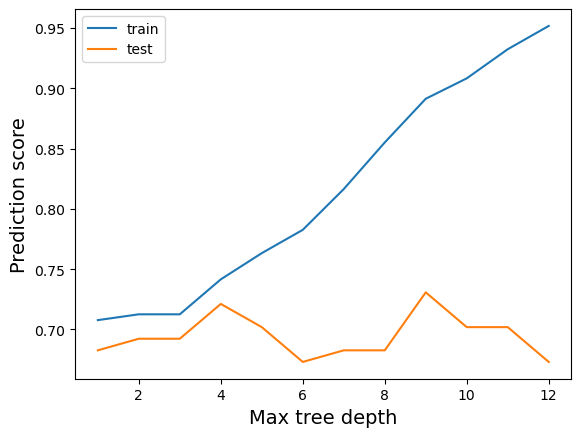

In [21]:
# prediction scores at different max tree depths
train_scores=[]
test_scores=[]
r=range(1,13)
for i in r:
    T = DecisionTreeClassifier(max_depth=i)
    T.fit(X2_train_loan, y_train_loan)
    train_scores.append(T.score(X2_train_loan, y_train_loan))
    test_scores.append(T.score(X2_test_loan, y_test_loan))

fig, ax = plt.subplots(1)
sns.lineplot(x=r,y=train_scores,label='train')
sns.lineplot(x=r,y=test_scores,label='test')
ax.set_ylabel('Prediction score', fontsize=14)
ax.set_xlabel('Max tree depth', fontsize=14)
ax.legend()

At roughly a tree depth of 7, our model without Credit_History starts to achieve a training accuracy above 80% and becomes able to predict as well as the previous indicator. However, the test accuracy never reaches 80% because, without Credit_History, the model no longer has access to the most important information for predicting loan approval. As the tree depth increases, the model can fit the training data better by memorizing complex patterns among the remaining features, but these patterns don’t generalize well to unseen test data.